In [6]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import pickle
import seaborn as sns
import pandas as pd
from tqdm import tqdm

In [2]:
with open('../results/create_all_pairs/embs.pickle', "rb") as outfile:
    embs = pickle.load(outfile)

In [3]:
gen_emb = np.asarray(embs['gen_embs'])
# idp_embs = np.asarray(embs['idp_embs'])


In [4]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(gen_emb[:100])
X_embedded.shape

(100, 2)

<Axes: >

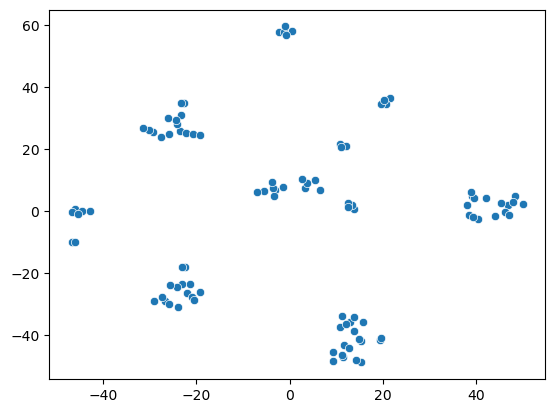

In [8]:
sns.scatterplot(x = X_embedded[:,0], y =X_embedded[:,1])

In [6]:
batch = np.random.randint(0,50,(100,100))

In [59]:
np.diag(batch)

(100,)

In [ ]:
for i,snp in enumerate(snp_ids):
    if preds[i] is in pairs[snp]:
        correct += 1
    if pred[i] is in pairs[idp]:
        correct +=1


In [7]:
maping = dict(zip(range(50),range(50)))

In [15]:
path_idps = '../data/T1_struct_brainMRI_IDPs.csv'
path_idp_map = '../data/T1mri.csv'
path_pairs = '../data/pairs.csv'

In [16]:
idp_map = pd.read_csv(path_idp_map, index_col= 1)
pairs = pd.read_csv(path_pairs)
pairs.IDP = pairs.IDP.map(idp_map.Field_ID.to_dict())

In [17]:
idps_raw = pd.read_csv(path_idps)
idps_map = pd.read_csv(path_idp_map) # mapping file 
idps_raw = idps_raw.loc[:, ~idps_raw.columns.str.replace("(\.\d+)$", "").duplicated()]
idps_filt = idps_raw.dropna(thresh=len(idps_raw) - 1, axis=1) # Drop columns with all NA values on columns
idps_filt = idps_filt.dropna(how= 'any', axis=0) # Drop rows (subjects) with NAs
idps_filt = idps_filt.iloc[1:]
idps_filt = idps_filt.set_index(idps_filt.iloc[:,0].astype('int'))
# self.idps_filt = self.idps_filt.iloc[:,1:]
idps_filt = idps_filt[~idps_filt.index.duplicated(keep='first')]
idps_idx = idps_filt.index

/tmp/ipykernel_2537125/3393231507.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261

In [18]:
idps_map = pd.read_csv('../data/IDPs_and_disease_mapping.csv', sep = '\t')
# idps_map.index = idps_map.index.str.replace('_', ' ')
idp_map.Field_ID = idp_map.Field_ID.astype('str')
idps_filt.columns = idps_filt.columns.map({a:b for a,b in zip(idp_map['Field_ID'],idp_map.index)})
matching_idps = np.intersect1d(idps_filt.columns,idps_map.index)
idps_map = idps_map.loc[matching_idps]
idps_map.Disease = idps_map.Disease.map({'Depression':'Unipolar_Depression',
        'Cerebrovascular_Disease':'Stroke',
        'ADHD':'ADHD',
        'PD':'PD',
        'Bipolar_Disorder':'BPD',
        'SZ':'SZ',
        'Multiple_Sclerosis':'MS',
        'Mood_Disorder':'MD',
        'Alzheimers_Disease':'AD'})
snps_map = pd.read_csv('../data/SNPs_and_disease_mapping.csv', sep = '\t')
snps_map.Disease = snps_map.Disease.apply(lambda x: x.split(', '))
snps_map = snps_map.explode('Disease')
matching_diseases = np.intersect1d(idps_map.Disease,snps_map.Disease)
snps_map_filtered = snps_map.loc[snps_map.Disease.isin(matching_diseases)]
idps_map_filtered = idps_map.loc[idps_map.Disease.isin(matching_diseases)]
bucket_snps = {}
bucket_idps = {}
for disease in matching_diseases:
    bucket_snps[disease] = snps_map_filtered.loc[snps_map_filtered.Disease == disease].SNPs.values
    bucket_idps[disease] = idps_map_filtered.loc[idps_map_filtered.Disease == disease].index.values
#

In [22]:
bucket_snps['AD'].shape


(938,)

In [50]:
print('Tokenization of seqs started')
# idp_id_map = dict(zip(idps_filt.columns,range(len(idps_filt.columns))))
# snp_id_map= dict(zip(seqs.columns,range(len(seqs.columns))))

pairs_all = {}
for disease in matching_diseases:
    print(f'Creating pairs for {disease}')
    pairs_disease = {}
    for idp in tqdm(bucket_idps[disease],  desc='idp loop'):
        snps = bucket_snps[disease]
        pairs_disease[idp]= snps
    pairs_all[disease] = pairs_disease

print('Full dataset traversed, all pairs made')

Tokenization of seqs started
Creating pairs for AD


idp loop: 100%|██████████| 1/1 [00:00<00:00, 16320.25it/s]


Creating pairs for ADHD


idp loop: 100%|██████████| 12/12 [00:00<00:00, 240821.28it/s]


Creating pairs for BPD


idp loop: 100%|██████████| 5/5 [00:00<00:00, 113975.65it/s]


Creating pairs for MD


idp loop: 100%|██████████| 1/1 [00:00<00:00, 20262.34it/s]


Creating pairs for MS


idp loop: 100%|██████████| 4/4 [00:00<00:00, 68759.08it/s]


Creating pairs for PD


idp loop: 100%|██████████| 8/8 [00:00<00:00, 134217.73it/s]


Creating pairs for Stroke


idp loop: 100%|██████████| 23/23 [00:00<00:00, 357292.56it/s]


Creating pairs for Unipolar_Depression


idp loop: 100%|██████████| 81/81 [00:00<00:00, 933347.87it/s]

Full dataset traversed, all pairs made


In [52]:
dd = defaultdict(list)

for d in (pairs_all['AD'],pairs_all['ADHD'],pairs_all['BPD'], pairs_all['MD'], pairs_all['MS'], pairs_all['PD'], pairs_all['Stroke'], pairs_all['Unipolar_Depression']): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)
    
# print(dd)

In [53]:
len(dd.keys())

135

In [54]:
print('Tokenization of seqs started')
# idp_id_map = dict(zip(idps_filt.columns,range(len(idps_filt.columns))))
# snp_id_map= dict(zip(seqs.columns,range(len(seqs.columns))))

pairs_all = {}
for disease in matching_diseases:
    print(f'Creating pairs for {disease}')
    pairs_disease = {}
    for snp in tqdm(bucket_snps[disease],  desc='idp loop'):
        snps = bucket_idps[disease]
        pairs_disease[snp]= snps
    pairs_all[disease] = pairs_disease

print('Full dataset traversed, all pairs made')

Tokenization of seqs started
Creating pairs for AD


idp loop: 100%|██████████| 938/938 [00:00<00:00, 1151040.71it/s]


Creating pairs for ADHD


idp loop: 100%|██████████| 1346/1346 [00:00<00:00, 2090938.22it/s]


Creating pairs for BPD


idp loop: 100%|██████████| 581/581 [00:00<00:00, 1828125.00it/s]


Creating pairs for MD


idp loop: 100%|██████████| 1702/1702 [00:00<00:00, 1947273.71it/s]


Creating pairs for MS


idp loop: 100%|██████████| 365/365 [00:00<00:00, 1729854.19it/s]


Creating pairs for PD


idp loop: 100%|██████████| 218/218 [00:00<00:00, 1446769.42it/s]


Creating pairs for Stroke


idp loop: 100%|██████████| 21/21 [00:00<00:00, 391468.37it/s]


Creating pairs for Unipolar_Depression


idp loop: 100%|██████████| 1060/1060 [00:00<00:00, 2132355.99it/s]

Full dataset traversed, all pairs made


In [55]:
dd = defaultdict(list)

for d in (pairs_all['AD'],pairs_all['ADHD'],pairs_all['BPD'], pairs_all['MD'], pairs_all['MS'], pairs_all['PD'], pairs_all['Stroke'], pairs_all['Unipolar_Depression']): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)
    
# print(dd)

In [56]:
len(dd.keys())

4320

In [58]:
dd['rs10002506']

[array(['Volume of grey matter in Supracalcarine Cortex (right)'],
       dtype=object)]

In [1]:
import pandas as pd

In [5]:
snps_pval = pd.read_csv('../data/SNPs_and_disease_mapping_with_pvalues.csv',sep = '\t')

In [6]:
snps_pval

,Unnamed: 0,SNPs,Disease,P-value
0,378,rs10000284,SCZ,4.000000e-20
1,379,rs10001365,ADHD,3.000000e-19
2,380,rs1000177,ASD,2.000000e-09
3,381,rs10002506,AD,2.000000e-08
4,383,rs10006235,SCZ,3.000000e-11
...,...,...,...,...
5592,13389,rs9992763,MS,2.000000e-11
5593,13391,rs9994140,ADHD,1.000000e-13
5594,13393,rs9994623,AD,1.000000e-08
5595,13394,rs999494,SCZ,2.000000e-10


In [7]:
snps_pval.groupby('Disease').mean('P-value')

,Unnamed: 0,P-value
Disease,,
AD,7230.019978,6.411887e-09
ADHD,7113.106013,5.218608e-09
ALS,7285.090909,8.135881e-09
ASD,7138.386861,8.738753e-09
BPD,6712.190678,1.158331e-08
MD,6277.344262,1.151326e-08
MS,7332.692521,3.311233e-09
PD,6773.152778,3.816034e-09
SCZ,7011.363636,7.946839e-09


In [12]:
snps_pval.groupby('Disease')['P-value'].nsmallest(10)

Disease                  
AD                   3264     0.000000e+00
                     5222     0.000000e+00
                     50      1.000000e-307
                     2108    1.000000e-295
                     4770    1.000000e-295
                                 ...      
Unipolar_Depression  3888     4.000000e-39
                     361      6.000000e-39
                     4383     1.000000e-38
                     2049     2.000000e-37
                     3771     3.000000e-35
Name: P-value, Length: 110, dtype: float64

In [15]:
snps_pval['Disease'].value_counts()

SCZ                    1342
AD                      901
Unipolar_Depression     862
ASD                     685
ADHD                    632
MS                      361
MD                      305
BPD                     236
PD                      216
ALS                      44
Stroke                   13
Name: Disease, dtype: int64

In [74]:
top_n_per = 10
snps_filt_pval = []
for d in snps_pval['Disease'].value_counts().index:
     snps_filt_pval.append(snps_pval.loc[snps_pval.loc[snps_pval['Disease']==d]['P-value'].nsmallest(int(len(snps_pval.loc[snps_pval['Disease']==d]['P-value'])*(top_n_per/100))).index])

In [76]:
pd.concat(snps_filt_pval).loc[:, ['SNPs','Disease']]

,SNPs,Disease
5239,rs835309,SCZ
8,rs10023464,SCZ
2763,rs3130820,SCZ
1476,rs140365013,SCZ
5563,rs9919557,SCZ
...,...,...
3132,rs3849943,ALS
1090,rs12608932,ALS
5152,rs80265967,ALS
4345,rs7019351,ALS


In [1]:
import pickle
with open('../results/top_1_per_4e_7500bz/embs.pickle', "rb") as outfile:
    embs = pickle.load(outfile)

In [3]:
embs.keys()

dict_keys(['gen_embs', 'idp_embs'])

In [5]:
len(embs['gen_embs'])

27651384

In [ ]:
num_pat * num_idps * num_snps =

27,651,384 ???